# Pruebas de Hipotesis

+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$


* Donde k- Es la afirmacion a comprobar
* y Mu es la media de nuestra muestra

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite

**3)**

Tamaño minimo de la muestra. (30)

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la z-test para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# p_value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$ No se rechaza hipotesis nula 
$$pvalue < umbral => H1$$ Se rechaza hipotesis nula

Se tiene por estandard que el grado e confianza pueden ser:

- Para el 90% confianza, alpha  es 0.1
- Para el 95% confianza, alpha  es 0.05
- Para el 99% confianza, alpha  es 0.01

# Ejemplo Farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [3]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
help(sm.stats.ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [5]:
import random

In [7]:
m = []
for i in range(101): #numero de pacientes
    m.append(round(random.normalvariate(5.1, 1.6),1))

In [ ]:
random.normalvariate()

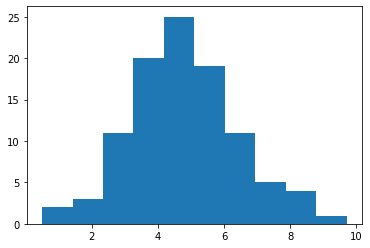

In [9]:
plt.hist(m);

In [11]:
values = sm.stats.ztest(m, value = 5.7, alternative = "smaller")

In [16]:
values # con un nivel de confianza de 90,95,99% podemos rechazar hipotesis nula con base en el pvalue menor al alpha

(-5.448505494078693, 2.539741130822398e-08)

In [13]:
import math

In [15]:
(5.1-5.7)/(1.6/math.sqrt(len(m))) #Valor de tablas

-3.768703357920337

# Ejemplo Altura

Estudio media altura humana, 50 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0? con un 95% de confianza, alpha = 0.05

In [18]:
from scipy.stats import norm
n = norm.rvs(1.72,0.2,50)

In [19]:
n.std()

0.19930398204265182

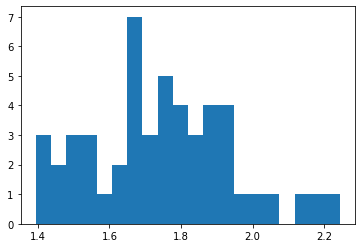

In [22]:
plt.hist(n, bins = 20)
plt.show();

In [24]:
values = sm.stats.ztest(n, value = 1.7, alternative = "larger")

In [25]:
values

(1.637874468934079, 0.05072394143383096)

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$

# Inidice masa corporal para los estado unidenses , mujeres y hombres
Se busca la diferencia entre ambas muestras

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

+ Hipotesis:
$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Con un 99% cofianza, alpha = 0.005 de cada lado, con un alpha de 0.01 completo

In [28]:
import pandas as pd

In [29]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [30]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [31]:
da['RIAGENDR'].unique()

array([1, 2], dtype=int64)

In [34]:
mujeres = da[da['RIAGENDR'] == 1]
hombres = da[da['RIAGENDR'] == 2]

#'BMXBMI' es el indice de masa corporal

media_m= mujeres['BMXBMI'].mean()
std_m = mujeres['BMXBMI'].std()

In [33]:
print(media_m, std_m)

28.778072111846942 6.2525676168014614


In [35]:
media_h= hombres['BMXBMI'].mean()
std_h = hombres['BMXBMI'].std()

In [36]:
print(media_h, std_h)

29.93994565217392 7.753318809545674


In [37]:
results = sm.stats.ztest(mujeres['BMXBMI'].dropna(),hombres['BMXBMI'].dropna(), alternative = 'two-sided' )
#print(f'El p_value de la prueba anterior es de {round(results[1])}')
results

(-6.1755933531383205, 6.591544431126401e-10)

In [38]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

In [39]:
ab_test=pd.read_csv('data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

Al 90% de confianza con alpha = 0.1

In [40]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [45]:
from scipy.stats import shapiro
#observaciones en cada muestra son independientes y distribuidas identicamente 

In [46]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)

In [48]:
p

0.19340917468070984

In [47]:
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Probably Gaussian


In [49]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [51]:
p

0.18342710340675566

In [50]:
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Probably Gaussian


In [57]:

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
#DA SI ES UNA RELACION LINEAL ENTRE SERIES

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably dependent


In [54]:
from scipy.stats import spearmanr 
#DA SI ES UNA RELACION ENTRE SERIES (puede ser o no lineal)
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)

In [56]:
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably dependent


In [59]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably the same distribution


# Error tipo 1 y Error 2

In [60]:
#Error tipo 1 es cuando rechazamos H0 cuando es verdadera
#Error tipo 2 es cuando no rechazamos H0 y es falsa